In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go

In [123]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [124]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


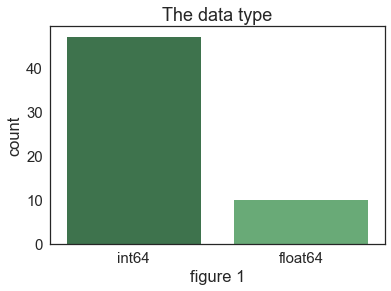

In [125]:
a = [x for x in all_features if (x!='target' and x!='id')]
a= train[a].dtypes
#sns.set_style('white',{"axes.facecolor": "1"})
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.5})
plt.figure(figsize=(6,4))
plt.title('The data type')
sns.countplot(a,palette = 'Greens_d')
plt.xlabel('figure 1')

plt.show()

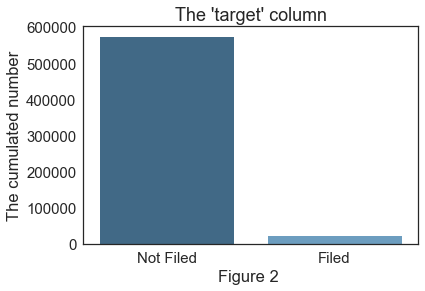

In [126]:
plt.figsize=(8,6)
train['target_name'] = train['target'].map({0: 'Not Filed', 1: 'Filed'})
sns.countplot(train.target_name,palette = 'Blues_d');
plt.xlabel('Figure 2 ');
plt.ylabel('The cumulated number');
plt.title('The \'target\' column')
plt.show()

Missing values for Train dataset


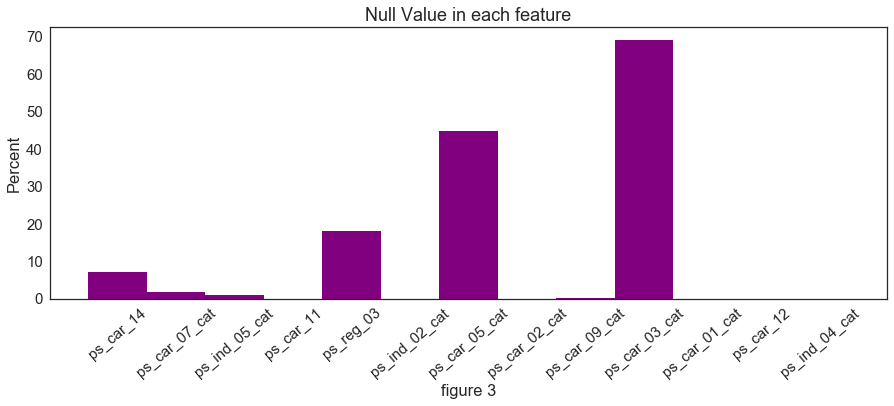

In [137]:
sns.set_style("white")
print("Missing values for Train dataset")
null_per = {}

for col in na:
    null_per[col] = na[col].sum() * 100 / na.shape[0]

null_per = dict(filter(lambda x: x[1] != 0, null_per.items()))
plt.figure(figsize=(15,5)) 
    #ax.set_xticklabels(xlabels, rotation=40)
plt.bar(range(len(null_per)), null_per.values(),width=1,facecolor = 'purple')
plt.ylabel('Percent')
plt.xticks(range(len(null_per)), null_per.keys(), rotation=40)
plt.title('Null Value in each feature')
#font = {'family' : 'serif',  
 #       'color'  : 'darkred',  
  #      'weight' : 'normal',  
   #     'size'   : 20,  
    #    }  
plt.xlabel('figure 3')
plt.show()
    

In [129]:
cal = [x for x in all_features if x[-3:]=='cat' ]
cal = ['target']+cal
train_filed = train.loc[train['target']==1,:]
cal

['target',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [130]:
sub_train = train.loc[train['target']==1]
data_col = [x for x in all_features if (x!='target' and x!='id')]
num = [x for x in data_col if x[-3:]=='cat' ]
sub_train = sub_train[num]
sub_train.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
9,1,0,0,11,0,0,1,0,14,1,1,2,1,104
19,1,1,0,7,1,-1,0,-1,1,1,1,2,1,64
28,2,1,4,4,0,-1,0,1,6,1,1,0,1,104
39,1,1,0,6,1,-1,0,-1,1,1,1,0,1,38
41,2,0,0,11,0,-1,0,-1,10,1,1,2,1,89


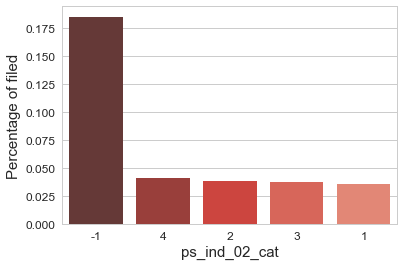

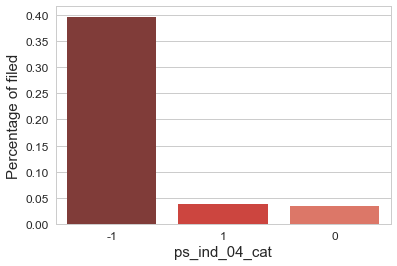

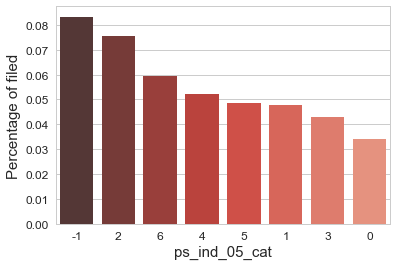

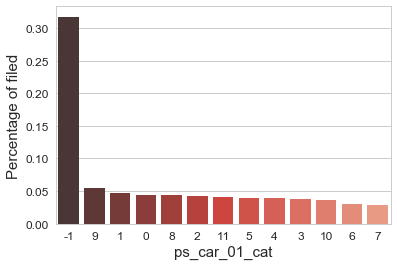

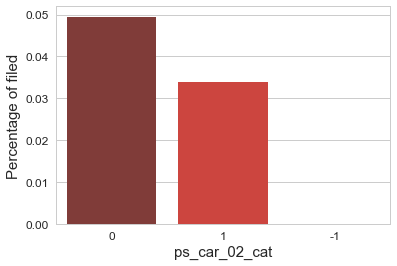

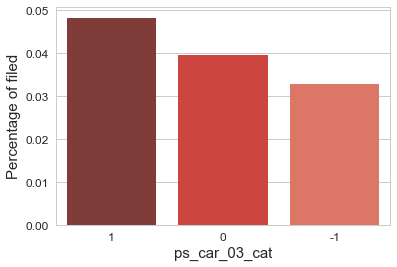

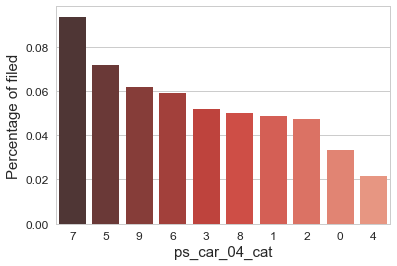

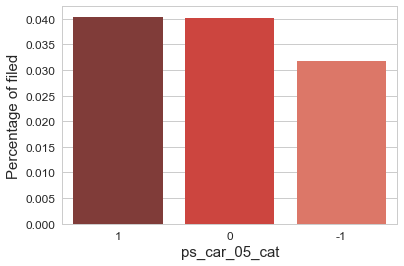

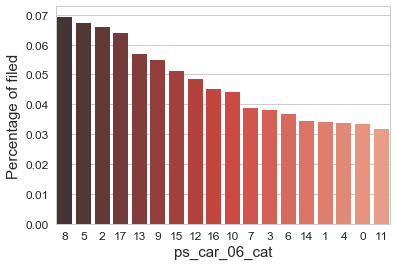

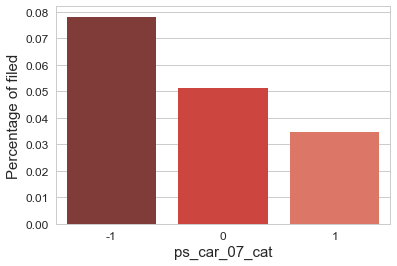

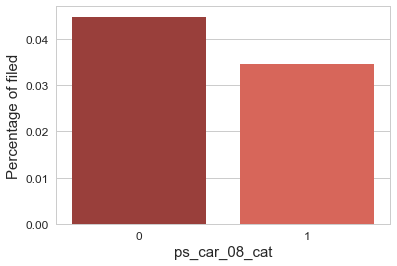

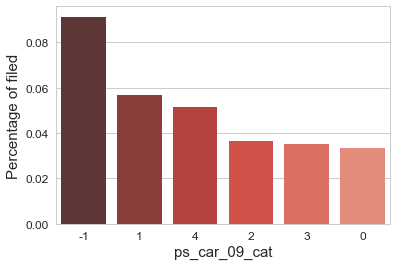

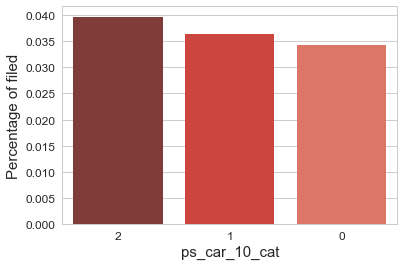

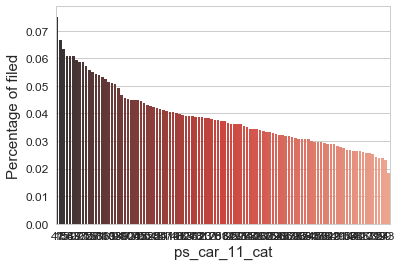

In [132]:
for col in sub_train.columns:
    f,ax = plt.subplots(figsize=(6,4))
    percentage = train[[col, 'target']].groupby([col],as_index=False).mean()
    percentage.sort_values(by='target', ascending=False, inplace=True)
    sns.barplot(ax=ax, x=col, y='target', data=percentage,palette = 'Reds_d', order=percentage[col])
    #sns.distplot(cat_perc,color='red')
    plt.ylabel('Percentage of filed', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

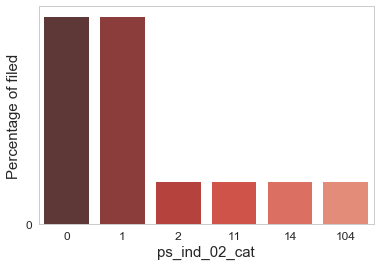

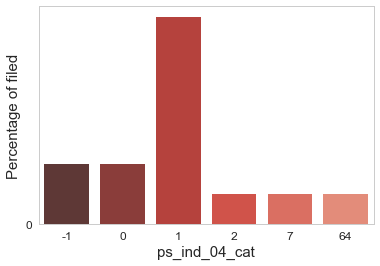

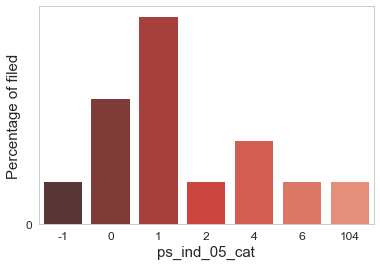

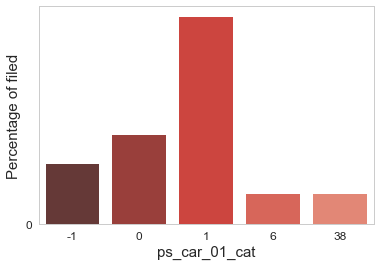

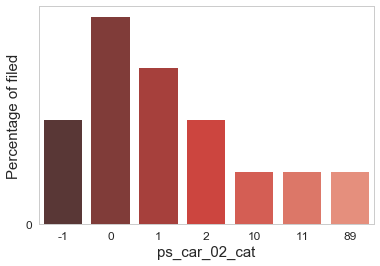

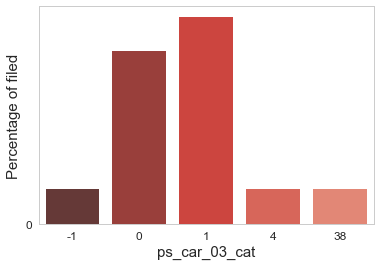

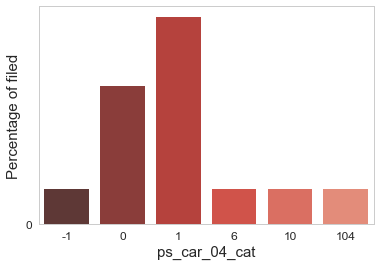

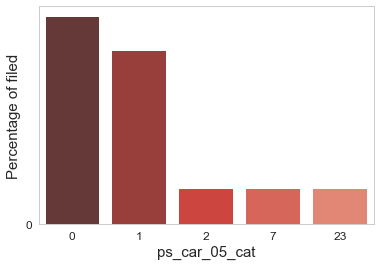

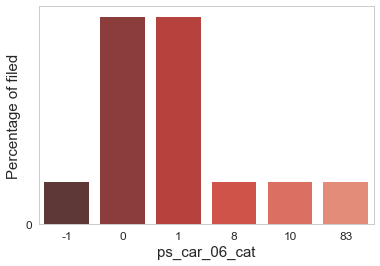

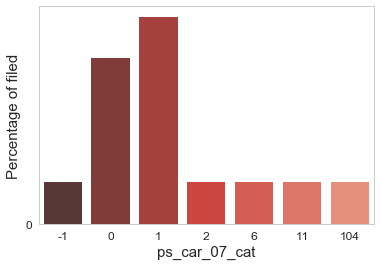

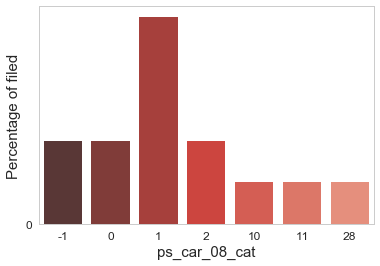

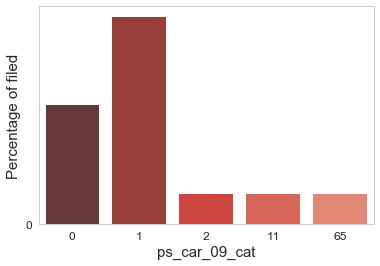

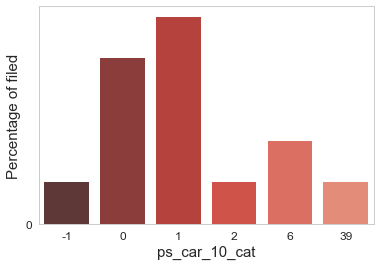

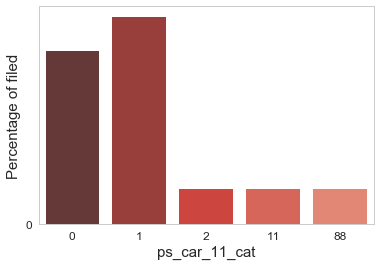

In [133]:


#sub_train.groupby(by = level)
for col in range(len(num)):
    f,ax = plt.subplots() 
    sns.countplot(sub_train.iloc[col],palette = 'Reds_d')
    plt.ylabel('Percentage of filed', fontsize=15)
    plt.xlabel(num[col], fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_yticks(np.arange(0,1))
    plt.show()

#data_train = train[data_col]

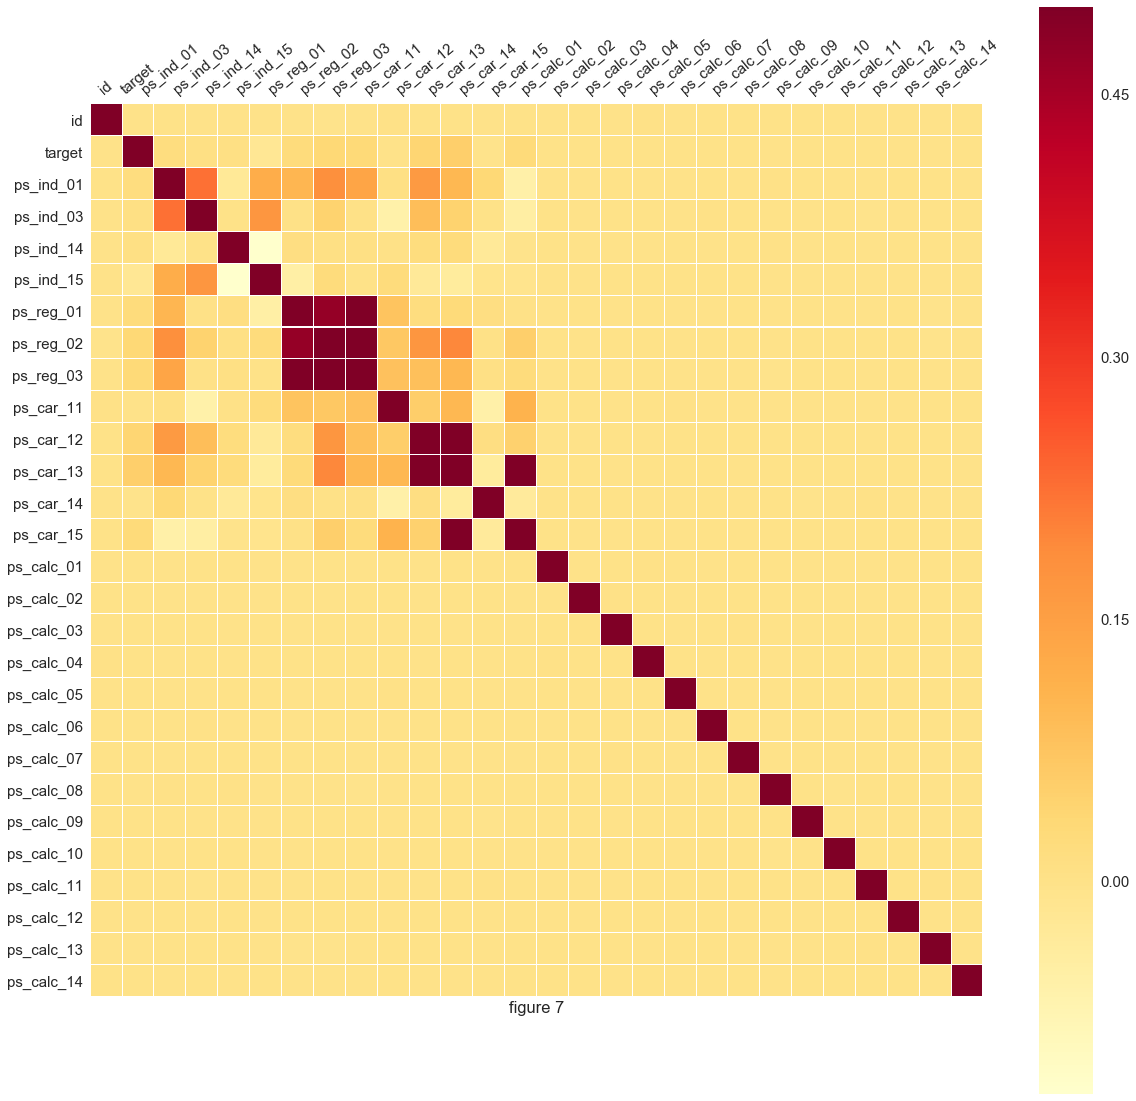

In [134]:
num_col = [x for x in all_features if x[-3:] not in ['bin', 'cat']]
train_num = train.loc[:,num_col]
xlabels = [index for index in num_col]

f,ax = plt.subplots(figsize=(20,20)) 
colormap = plt.cm.YlOrRd

sns.heatmap(train_num.corr(),linewidths=0.05,vmax=0.5, square=True,cmap=colormap, linecolor='white', annot=False)

ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.xlabel('figure 7')
plt.show()